# Breast Cancer Wisconsin - Malignant or Benign Tumor

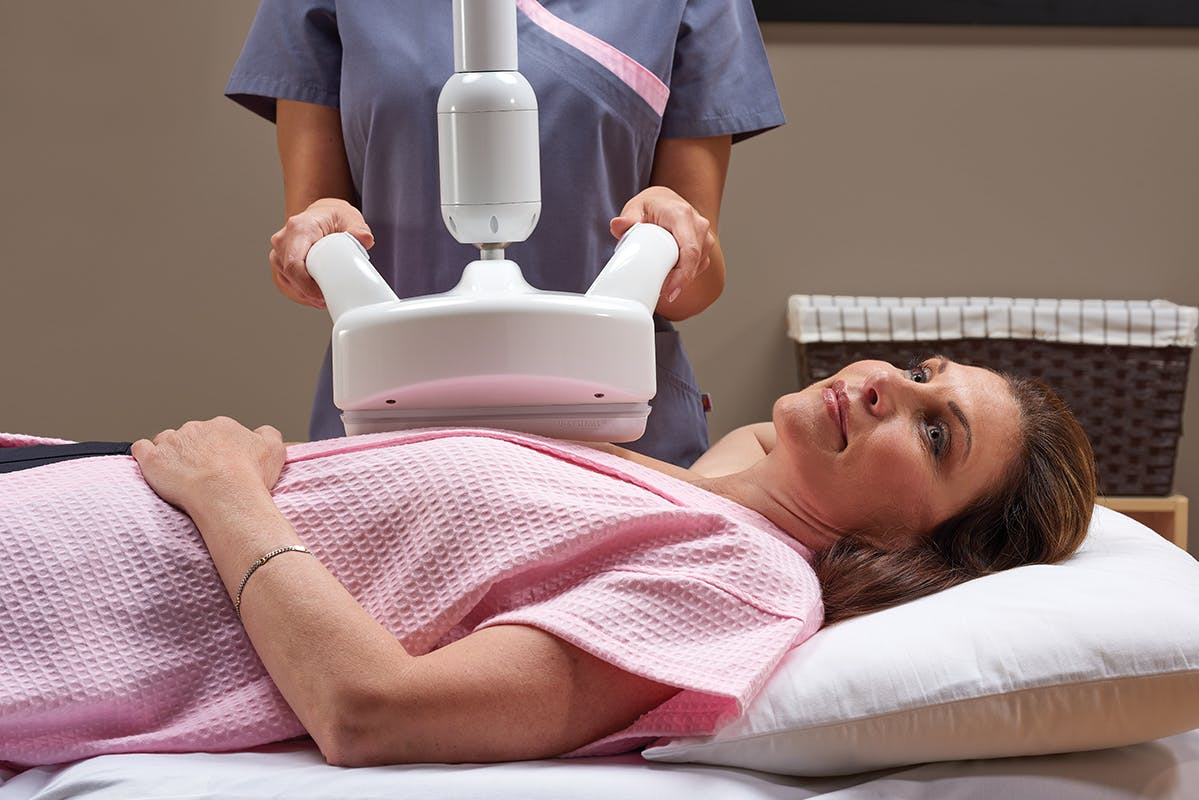

In [1]:
import IPython
url = 'https://i.ibb.co/T068424/678065.jpg'
IPython.display.Image(url, width = 900)

In [2]:
# reikalingų bibliotekų importavimas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# grafikų atvaizdavimui
%matplotlib inline

# duomenų padalinimui
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

# modelių sukūrimui
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# modelio tikslumo įvertinimui
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

In [3]:
# failo nuskaitymas
df = pd.read_csv('data.csv')

In [4]:
# failo charakteristikos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


## Kintamieji

Šiame duomenų rinkinyje kintamieji yra 10 skirtingų dydžių apibūdinančių krūties vėžio formą. Spindulys, plotas, simetrija, įdubimas ir kiti. Matavimai buvo atlikti naudojant fine needle aspiration (FNA) metodą, liet. uždara biopsija tomografu.

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)\
b) texture (standard deviation of gray-scale values)\
c) perimeter\
d) area\
e) smoothness (local variation in radius lengths)\
f) compactness (perimeter^2 / area - 1.0)\
g) concavity (severity of concave portions of the contour)\
h) concave points (number of concave portions of the contour)\
i) symmetry\
j) fractal dimension ("coastline approximation" - 1)\

The mean, standard error and "worst" or largest (mean of the three\
largest values) of these features were computed for each image,\
resulting in 30 features. For instance, field 3 is Mean Radius, field\
13 is Radius SE, field 23 is Worst Radius.

## Klasifikavimo uždavinys

Tikslas - pagal duotus kintamuosius, prognozuoti, ar auglys yra Malignant (piktybinis) ar Benign (nepiktybinis).

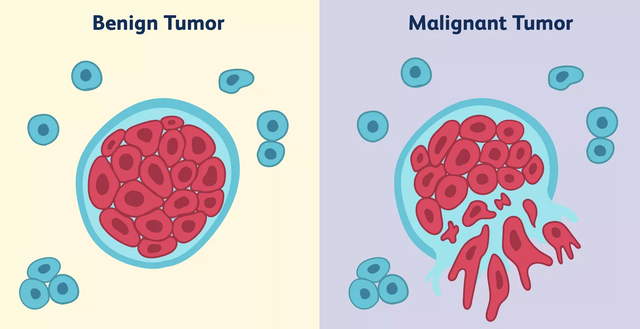

In [6]:
url = 'https://i.ibb.co/qDzYsVD/Capture.png'
IPython.display.Image(url, width = 900)

## 'Mini' duomenų tvarkymas

In [7]:
# nereikalingų stulpelių išmetimas
df = df.drop(columns = ['id', 'Unnamed: 32'], axis = 1, inplace = False)

In [8]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [9]:
# patikrinimas, ar visos reikšmės nėra 'null'
df.notnull().count().sum() == 569 * 31

True

## Grafinė duomenų apžvalga

Text(0.5, 1.0, 'compactness_mean for Malignant and BeningTumors')

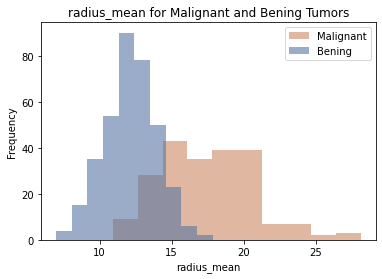

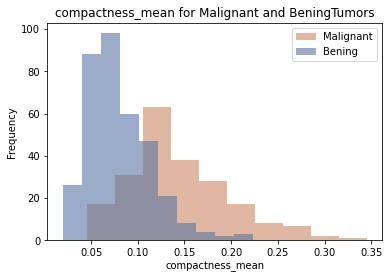

In [10]:
plt.figure(figsize = (6, 4))
x1 = plt.hist(df.loc[df['diagnosis'] == 'M']['radius_mean'], alpha = 0.6, bins = 10, label = 'Malignant', color = '#cc8863')
y1 = plt.hist(df.loc[df['diagnosis'] == 'B']['radius_mean'], alpha = 0.6, bins = 10, label = 'Bening', color = '#5975a4')
plt.legend(loc = 'upper right')
plt.xlabel('radius_mean')
plt.ylabel('Frequency')
plt.title('radius_mean for Malignant and Bening Tumors')


plt.figure(figsize = (6, 4))
x2 = plt.hist(df.loc[df['diagnosis'] == 'M']['compactness_mean'], alpha = 0.6, bins =10, label = 'Malignant', color = '#cc8863')
y2 = plt.hist(df.loc[df['diagnosis'] == 'B']['compactness_mean'], alpha = 0.6, bins = 10, label = 'Bening', color = '#5975a4')
plt.legend(loc = 'upper right')
plt.xlabel('compactness_mean')
plt.ylabel('Frequency')
plt.title('compactness_mean for Malignant and BeningTumors')

B    357
M    212
Name: diagnosis, dtype: int64

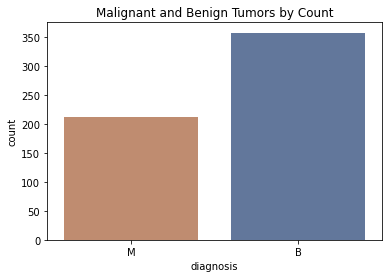

In [11]:
# piktybinių ir nepiktybinių auglių kiekinis palyginimas
plt.figure(figsize = (6, 4))
plt.title('Malignant and Benign Tumors by Count')
sns.countplot(df['diagnosis'], palette = ['#cc8863', '#5975a4'])

df['diagnosis'].value_counts()

Text(0.5, 1.0, 'compactness_mean for Malignant Tumors and Bening')

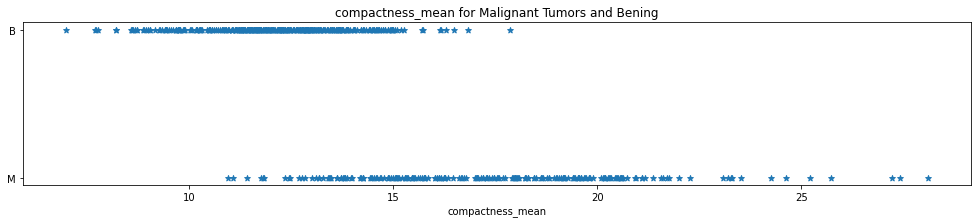

In [12]:
# Melignant and Bening priklausomybė nuo compactness_mean vertės
plt.figure(figsize = (17, 3))
plt.scatter(df['radius_mean'], df['diagnosis'], marker = '*')
plt.xlabel('compactness_mean')
plt.title('compactness_mean for Malignant Tumors and Bening')

Text(0.5, 1.0, 'radius_mean by perimeter_mean')

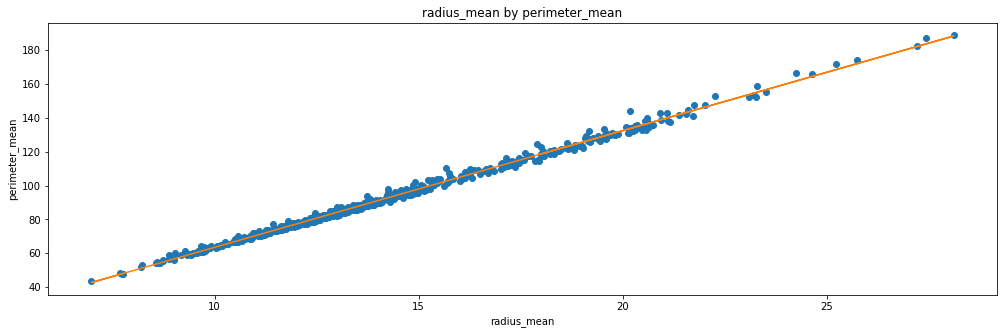

In [13]:
# perimeter_mean priklausomybė nuo radius_mean vertės
plt.figure(figsize = (17, 5))
x = df['radius_mean']
y = df['perimeter_mean']
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m * x + b)

plt.xlabel('radius_mean')
plt.ylabel('perimeter_mean')
plt.title('radius_mean by perimeter_mean')

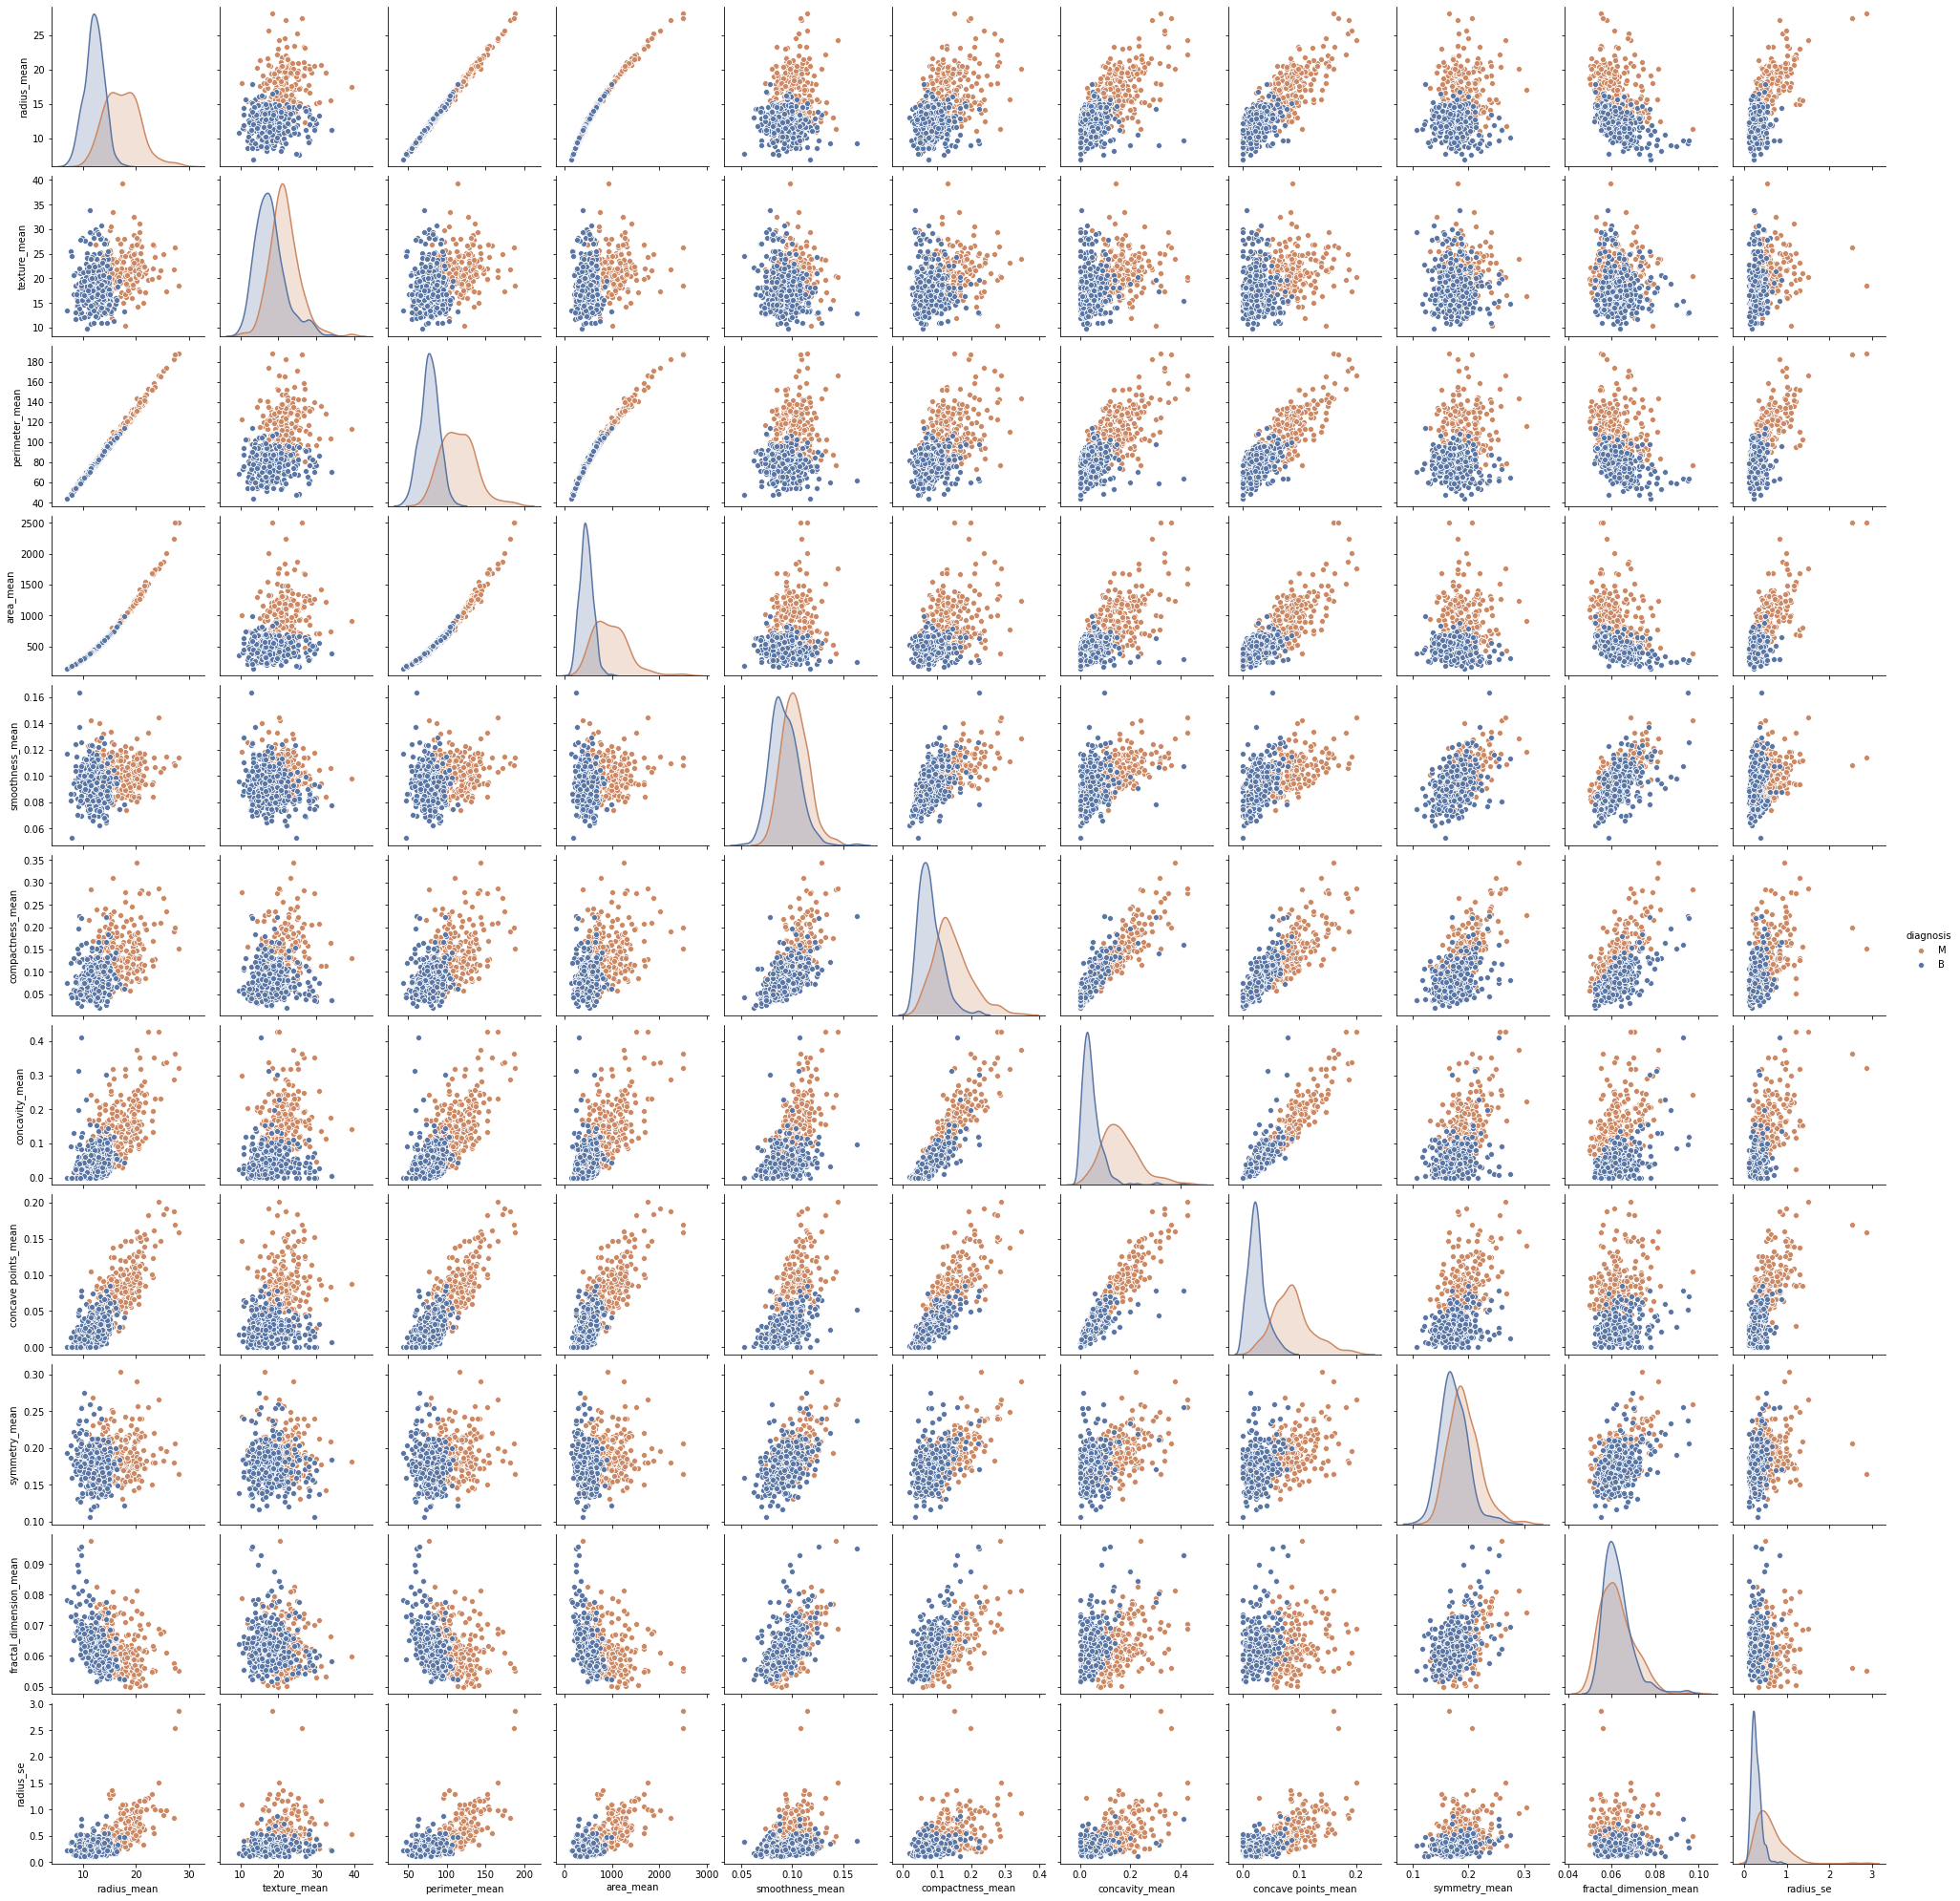

In [14]:
# grafikų matrica pagal kiekvieną kintamąjį
sns.pairplot(df.iloc[:, 0:12], hue='diagnosis', palette = ['#cc8863', '#5975a4'])

In [15]:
# koreliacija tarp pirmų 10 stulpelių
df.iloc[:, 1:11].corr()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


In [16]:
# pirmų 10 stulpelių forma
df.iloc[:, 1:11].shape

(569, 10)

In [17]:
# mask kūrimas matricos filtravimui
mask = np.zeros_like(df.iloc[:, 1:11].corr())
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

In [18]:
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [19]:
# mask forma
mask.shape

(10, 10)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]),
 <a list of 10 Text major ticklabel objects>)

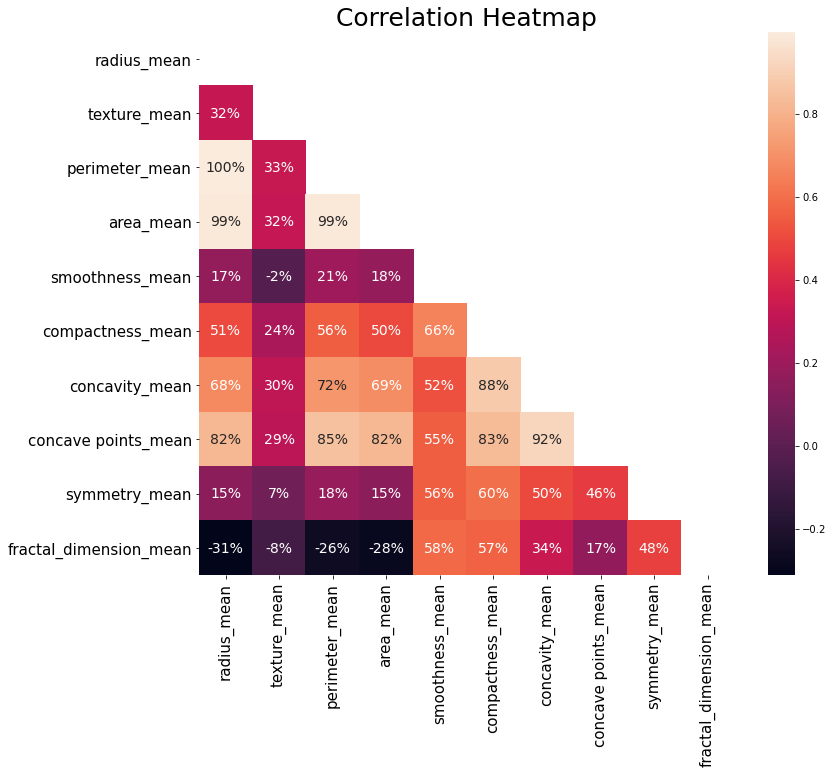

In [20]:
plt.figure(figsize = (12, 10))
plt.title('Correlation Heatmap', fontsize =25)

# taškų intensyvumo matricos braižymas
sns.heatmap(df.iloc[:, 1:11].corr(), mask = mask, annot = True, fmt='.0%', annot_kws = {'size': 14 })
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

In [21]:
# stulpelio 'diagnosis' reikšmės 'M' pakeičiamos į '1', o reikšmės 'B' - į '0'.
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})

In [22]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Train-Test Split, Kfold, modelių kūrimas 

In [36]:
# padidinu maksimalų iteracijų skaičių, nes prieš tai buvo error'as
max_iter = 100000

# tikslas ir kintamieji
target = 'diagnosis'
num = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

# y, X apibrėžimas
y = df[target] 
X = df[num]

# train test padalinimas
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)


# Modelių kūrimas

# LogisticRegression modelio kūrimas
model1 = LogisticRegression(random_state = 0)

# DecisionTreeClassifier modelio kūrimas
model2 = DecisionTreeClassifier(random_state=0)

# RandomForestClassifier modelio kūrimas
model3 = RandomForestClassifier(random_state = 0)

# train duomenų duomenų dalies padalinimas į 5 dalis
kf = KFold(n_splits=5)

# reikšmės sukeliamos į sąrašus
scores_model1 = []
scores_model2 = []
scores_model3 = []

# kiekvienam modeliui gaunamos 5 tikslumo reikšmės
for train_index, test_index in kf.split(X):
#     print("Train Index: ", train_index)
#     print("Test Index: ", test_index, "\n")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    model1.fit(X_train, y_train)
    scores_model1.append(model1.score(X_test, y_test))

    model2.fit(X_train, y_train)
    scores_model2.append(model2.score(X_test, y_test))
    
    model3.fit(X_train, y_train)
    scores_model3.append(model3.score(X_test, y_test))
    
# spausdinami atsakymai   
print('LogisticRegression reikšmės:', scores_model1)
print('LogisticRegression vidutinis tikslumas:', np.mean(scores_model1), "\n")
print('DecisionTreeClassifier reikšmės:', scores_model2)
print('DecisionTreeClassifier vidutinis tikslumas:', np.mean(scores_model2), "\n")
print('RandomForestClassifier reikšmės:', scores_model3)
print('RandomForestClassifier vidutinis tikslumas:', np.mean(scores_model3), "\n")

LogisticRegression reikšmės: [0.8596491228070176, 0.9298245614035088, 0.9649122807017544, 0.956140350877193, 0.9203539823008849]
LogisticRegression vidutinis tikslumas: 0.9261760596180718 

DecisionTreeClassifier reikšmės: [0.8859649122807017, 0.8771929824561403, 0.9210526315789473, 0.9210526315789473, 0.9203539823008849]
DecisionTreeClassifier vidutinis tikslumas: 0.9051234280391244 

RandomForestClassifier reikšmės: [0.8859649122807017, 0.9385964912280702, 0.9736842105263158, 0.9649122807017544, 0.9469026548672567]
RandomForestClassifier vidutinis tikslumas: 0.9420121099208197 



## Parametrų pasirinkimas RandomForestClassifier mokymosi algoritmui

In [24]:
# toliau naudoju RandomForestClassifier, nes jo tikslumas buvo didžiausias
# ciklas padedantis padidinti RandomForestClassifier mokymosi modelio tikslumą
scores_model3_1 = []
for n in [2, 4, 6, 8, 10, 12, 14]:
    for m in ['entropy', 'gini']:
        model4 = RandomForestClassifier(n_estimators = n, criterion = m, random_state = 0)
        model4.fit(X_train, y_train)
        scores_model3_1.append(model4.score(X_test, y_test))
        print(n, m, model4.score(X_test, y_test))
print("\n", 'RandomForestClassifier visos reikšmės:', scores_model3_1, "\n")

2 entropy 0.9203539823008849
2 gini 0.8938053097345132
4 entropy 0.9292035398230089
4 gini 0.9469026548672567
6 entropy 0.9557522123893806
6 gini 0.9646017699115044
8 entropy 0.9557522123893806
8 gini 0.9734513274336283
10 entropy 0.9646017699115044
10 gini 0.9734513274336283
12 entropy 0.9557522123893806
12 gini 0.9646017699115044
14 entropy 0.9557522123893806
14 gini 0.9646017699115044

 RandomForestClassifier visos reikšmės: [0.9203539823008849, 0.8938053097345132, 0.9292035398230089, 0.9469026548672567, 0.9557522123893806, 0.9646017699115044, 0.9557522123893806, 0.9734513274336283, 0.9646017699115044, 0.9734513274336283, 0.9557522123893806, 0.9646017699115044, 0.9557522123893806, 0.9646017699115044] 



## Modelio tikslumo įvertinimas

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        87
           1       0.90      1.00      0.95        26

    accuracy                           0.97       113
   macro avg       0.95      0.98      0.96       113
weighted avg       0.98      0.97      0.97       113

Galutinis modelio tikslumas skaičiuojant su Confusion Matrix 
 (TP + TN)/(TP + TN + FN + FP)): 
 ✦✦✦✦✦ 0.9734513274336283 ✦✦✦✦✦



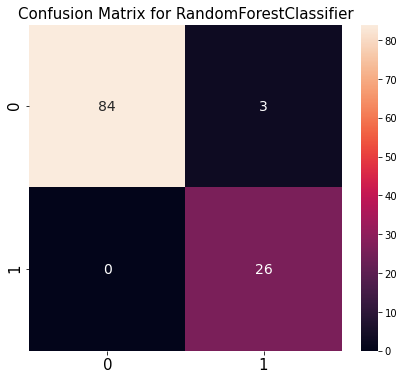

In [25]:
# RandomForestClassifier mokymosi algoritmas tiksliausias, kai n_estimators = 10, criterion = 'gini',
# todėl tolimesniam modelio tikslumo vertinimui šiuos parametrus ir naudoju
model3_2 = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 0)
model3_2.fit(X_train, y_train)

# confusion matrix bražymas
cm2 = confusion_matrix(y_test, model3_2.predict(X_test))
plt.figure(figsize = (7, 6))
plt.title('Confusion Matrix for RandomForestClassifier', fontsize = 15)
sns.heatmap(cm2, annot = True, annot_kws = {'size': 14 })
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# kiekvieno confusion matrix laukelio priskyrimas skaičiui
TP = confusion_matrix(y_test, model3_2.predict(X_test))[0][0]
TN = confusion_matrix(y_test, model3_2.predict(X_test))[1][1]
FN = confusion_matrix(y_test, model3_2.predict(X_test))[1][0]
FP = confusion_matrix(y_test, model3_2.predict(X_test))[0][1]

c1 = (TP + TN)/(TP + TN + FN + FP)
    
# papildomų tikslumo vertinimų reikšmės
print(classification_report(y_test, model3_2.predict(X_test)))
print('Galutinis modelio tikslumas skaičiuojant su Confusion Matrix', "\n",
      '(TP + TN)/(TP + TN + FN + FP)):', "\n",
      '✦✦✦✦✦', ((TP + TN)/(TP + TN + FN + FP)), '✦✦✦✦✦' "\n")

,cols,imps
0,radius_mean,0.064122
1,texture_mean,0.057541
2,perimeter_mean,0.090194
3,area_mean,0.109584
4,smoothness_mean,0.033646
5,compactness_mean,0.057911
6,concavity_mean,0.223836
7,concave points_mean,0.344653
8,symmetry_mean,0.006132
9,fractal_dimension_mean,0.012382


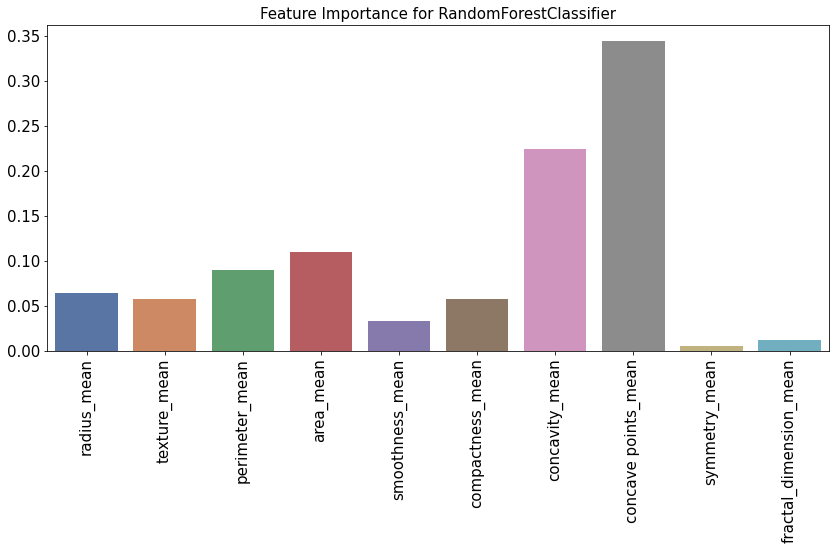

In [26]:
# kintamųjų svarbumas RandomForestClassifier mokymosi algoritmui

feat_imp=pd.DataFrame({'cols':X_test.columns, 'imps':model3_2.feature_importances_})

plt.figure(figsize = (14, 6))
plt.title('Feature Importance for RandomForestClassifier', fontsize = 15)
plt.xticks(fontsize = 15, rotation = 90)
plt.yticks(fontsize = 15)
sns.barplot(x = X_test.columns, y = model3_2.feature_importances_, palette = 'deep')
feat_imp

In [27]:
# prognozuojamos ir tikros vertės pirmoms penkioms eilutėms
a = df.iloc[0:5, 1:11]
print(model3_2.predict(a))
df.iloc[0:5, 0:1]

[1 1 1 1 1]


,diagnosis
0,1
1,1
2,1
3,1
4,1


## Principal Component Analysis (PCA)

In [28]:
# duomenų normalizavimas
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

df.iloc[:, 1:11] = sc.fit_transform(df.iloc[:, 1:11])
df.iloc[:, 1:11]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450
...,...,...,...,...,...,...,...,...,...,...
564,2.110995,0.721473,2.060786,2.343856,1.041842,0.219060,1.947285,2.320965,-0.312589,-0.931027
565,1.704854,2.085134,1.615931,1.723842,0.102458,-0.017833,0.693043,1.263669,-0.217664,-1.058611
566,0.702284,2.045574,0.672676,0.577953,-0.840484,-0.038680,0.046588,0.105777,-0.809117,-0.895587
567,1.838341,2.336457,1.982524,1.735218,1.525767,3.272144,3.296944,2.658866,2.137194,1.043695


In [29]:
# kintamųjų sujungimas į 3 naujus kintamuosius
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(df.iloc[:, 1:11])

# naujų kintamųjų sujungimas su 'diagnosis' stulpeliu
a_pca = pca.transform(df.iloc[:, 1:11])
df1 = pd.DataFrame(data = a_pca)
df2 = df1.join(df.iloc[:,0])

In [30]:
df2.iloc[:, 0:4]

,0,1,2,diagnosis
0,5.224155,3.204428,-2.171340,1
1,1.728094,-2.540839,-1.019679,1
2,3.969757,-0.550075,-0.323569,1
3,3.596713,6.905070,0.792832,1
4,3.151092,-1.358072,-1.862234,1
...,...,...,...,...
564,4.436781,-2.020670,-0.457737,1
565,2.874757,-2.395235,1.169465,1
566,0.649583,-2.041783,1.710966,1
567,6.905664,1.216243,1.640120,1


              precision    recall  f1-score   support

           0       0.97      0.96      0.97        72
           1       0.93      0.95      0.94        42

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114

Galutinis modelio tikslumas skaičiuojant su Confusion Matrix 
 (TP + TN)/(TP + TN + FN + FP)): 
 ✦✦✦✦✦ 0.956140350877193 ✦✦✦✦✦



<ipython-input-31-4d0fc89189a8>:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model3_3.fit(X_train, y_train)


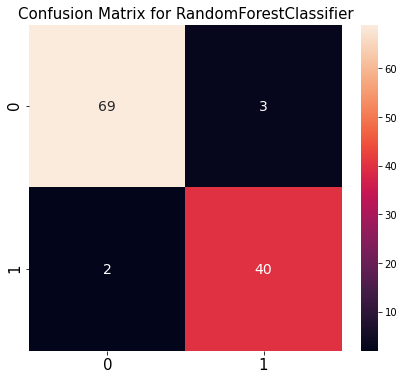

In [31]:
# naujo modelio kūrimas

# y, X apibrėžimas
y = df2.iloc[:, 3:4] 
X = df2.iloc[:, 0:3]

# train test padalinimas
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80)

# RandomForestClassifier modelio kūrimas
model3_3 = RandomForestClassifier(n_estimators = 10, criterion = 'gini', random_state = 0)
model3_3.fit(X_train, y_train)

# confusion matrix bražymas
cm2 = confusion_matrix(y_test, model3_3.predict(X_test))
plt.figure(figsize = (7, 6))
plt.title('Confusion Matrix for RandomForestClassifier', fontsize = 15)
sns.heatmap(cm2, annot = True, annot_kws = {'size': 14 })
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)

# kiekvieno confusion matrix laukelio priskyrimas skaičiui
TP = confusion_matrix(y_test, model3_3.predict(X_test))[0][0]
TN = confusion_matrix(y_test, model3_3.predict(X_test))[1][1]
FN = confusion_matrix(y_test, model3_3.predict(X_test))[1][0]
FP = confusion_matrix(y_test, model3_3.predict(X_test))[0][1]
    
c2 = (TP + TN)/(TP + TN + FN + FP)
    
# papildomų tikslumo vertinimų reikšmės
print(classification_report(y_test, model3_3.predict(X_test)))
print('Galutinis modelio tikslumas skaičiuojant su Confusion Matrix', "\n",
      '(TP + TN)/(TP + TN + FN + FP)):', "\n",
      '✦✦✦✦✦', ((TP + TN)/(TP + TN + FN + FP)), '✦✦✦✦✦' "\n")

## Naujų sukurtų kintamųjų grafinis atvaizdavimas

➤ modelio tikslumas sumažėjo naudojant naujus kintamuosius


<IPython.core.display.Javascript object>


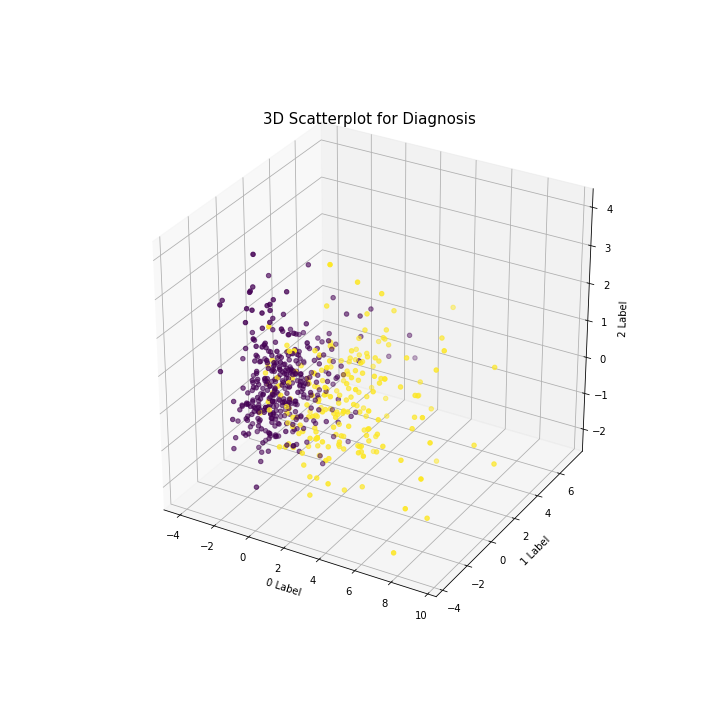

Text(0.5, 0, '2 Label')

In [34]:
# modelio tikslumo palyginimas naudojant 10 pradinių kintamųjų ir 3 naujus kintamuosius
if c1 > c2:
    print('➤ modelio tikslumas sumažėjo naudojant naujus kintamuosius')
else:
    print('➤ modelio tikslumas padidėjo naudojant naujus kintamuosius')
    
# paleidžiama aplinka interaktyvių grafikų atvaizdavimui
%matplotlib notebook

# kintamųjų reikšmių priskyrimas ašims
x = df2.iloc[:, 0:1]
y = df2.iloc[:, 1:2]
z = df2.iloc[:, 2:3]
target = df2.iloc[:, 3:4]

new_data = [x,y,z,target]
new_data = pd.concat(new_data, axis = 1, ignore_index = True )
new_data.columns = ['x','y','z','target']

fig = plt.figure(figsize = (10, 10))

ax = fig.add_subplot(111, projection = '3d')
ax.scatter(new_data.x, new_data.y, new_data.z, c = df2['diagnosis'])

plt.title('3D Scatterplot for Diagnosis', fontsize = 15)

ax.set_xlabel('0 Label')
ax.set_ylabel('1 Label')
ax.set_zlabel('2 Label')

<IPython.core.display.Javascript object>


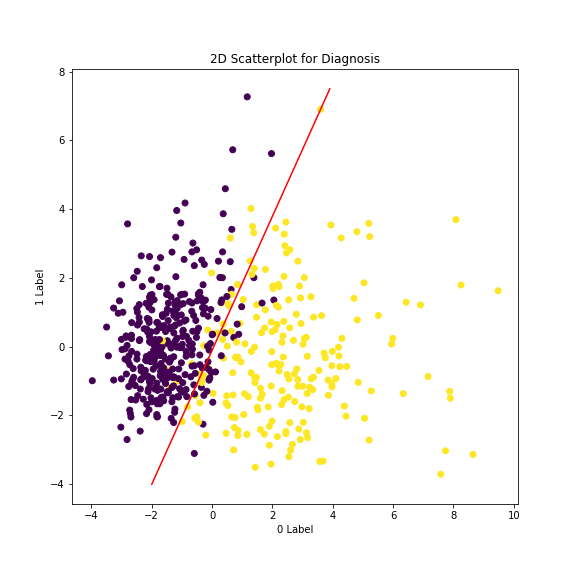

Text(0.5, 1.0, '2D Scatterplot for Diagnosis')

In [35]:
plt.figure(figsize=(8,8))
plt.scatter( df2.iloc[:, 0:1], df2.iloc[:, 1:2], c = df2['diagnosis'])

plt.title('2D Scatterplot for Diagnosis', fontsize = 15)

# 'diagnosis' verčių apytikslis padalinimas tiese
x = [3.9, -2]
y = [7.5, -4]
plt.plot(x, y, color = 'red')

plt.xlabel('0 Label')
plt.ylabel('1 Label')
plt.title('2D Scatterplot for Diagnosis')